In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split

In [2]:
dp=pd.read_csv('C:\\Users\\hp\\Desktop\\FODS_2\\FODS-A2.csv')

In [3]:
X=dp.iloc[:,0:26]

In [4]:
y=dp.iloc[:,26:27]

In [5]:
X=(X-X.mean())/X.std()
y=(y-y.mean())/y.std()

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=70,shuffle=True)

In [7]:
n=len(X_train)
X_train.insert(0,"X0",1,allow_duplicates=False)

In [8]:
n=len(X_test)
X_test.insert(0,"X0",1,allow_duplicates=False)

In [9]:
def calc_weights(X,y):
    weights=np.ones((X_train.shape[1],1))
    prod=np.dot(X.transpose(),X)
    inv_mat=np.linalg.inv(prod)
    prod_1=np.dot(inv_mat,X.transpose())
    weights=np.dot(prod_1,y)
    return weights

In [10]:
def model_error(X,y,weights):
    n=len(X)
    err=(1/(2*n))*np.sum(np.square(y-np.dot(X,weights)))
    return err

In [11]:
weights=calc_weights(X_train,y_train)
print("The final weights for model is:", weights)
training_error=model_error(X_train,y_train,weights)
testing_error=model_error(X_test,y_test,weights)
print("Training Error is equal to:", training_error)
print("Testing Error is equal to:", testing_error)

The final weights for model is: [[ 1.82272747e-03]
 [ 2.68771513e-02]
 [ 6.31181273e-01]
 [-5.19294682e-01]
 [-6.03273501e-01]
 [ 5.10527595e-01]
 [ 1.16188805e-01]
 [ 1.12550172e-01]
 [ 1.55453166e-01]
 [-2.83770593e-02]
 [ 3.77086579e-02]
 [ 4.25522578e-01]
 [ 1.04522613e-01]
 [-2.65742242e-02]
 [-1.28491286e-01]
 [ 1.79904424e-01]
 [-2.77146052e-01]
 [-3.82771018e-01]
 [-5.08457962e-02]
 [-3.57583028e-01]
 [ 1.27750531e-04]
 [-7.19669236e-02]
 [ 4.20908392e-02]
 [ 2.16350276e-02]
 [ 6.74893839e-02]
 [-1.43804827e-02]
 [ 0.00000000e+00]]
Training Error is equal to: Appliances    0.446739
dtype: float64
Testing Error is equal to: Appliances    0.360713
dtype: float64


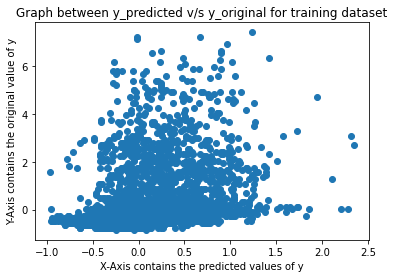

In [12]:
y_train_hat=np.dot(X_train,weights)
plt.scatter(y_train_hat,y_train)
plt.xlabel("X-Axis contains the predicted values of y")
plt.ylabel("Y-Axis contains the original value of y")
plt.title("Graph between y_predicted v/s y_original for training dataset")
plt.show()

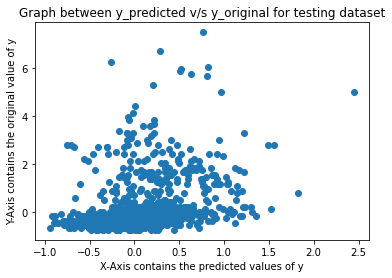

In [13]:
y_test_hat=np.dot(X_test,weights)
plt.scatter(y_test_hat,y_test)
plt.xlabel("X-Axis contains the predicted values of y")
plt.ylabel("Y-Axis contains the original value of y")
plt.title("Graph between y_predicted v/s y_original for testing dataset")
plt.show()